# Linear Programs - LPs

#### Needed Libraries

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

from data import data 
from Plot import plot
from LPSolver import solve
from Criteria import crit_Test
from equality_measures import measures

In [2]:
criteria_abbr = ['FNOI', 'ASD', 'KKT', 'DG', 'DGKKT', 'SDG']
criteria = ['Fixed Number of Iterations', 'Algorithmic Slow Down', 'Karush–Kuhn–Tucker', 
                                                    'Duality Gap', 'Mixed Duality Gap with KKT', 'Smoothed Duality Gap']
fv = 'Function Values'
do = 'Distance to Optimum'

### We're going to test the following Stopping Criteria

1. Fixed Number of Iterations (*FNOI*)
2. Algorithmic Slow Down (*ASD*)
3. KKT Conditions (*KKT*)
4. Duality Gap (*DG*)
5. Mixed Dulaity Gap with KKT Conditions (*DGKKT*)
6. Smoothed Duality Gap (*SDG*)

## Example 01

### Data

In [6]:
c2 = np.random.randint(0, 5, 100)
Ag2 = np.random.randint(-10, 15, size=(150, 100))
bg2 = np.random.randint(0, 20, 150)

In [7]:
cvx2, splx2 = solve(c2, Ag = Ag2, bg = bg2)

Phase2:- 


CRITERION 1


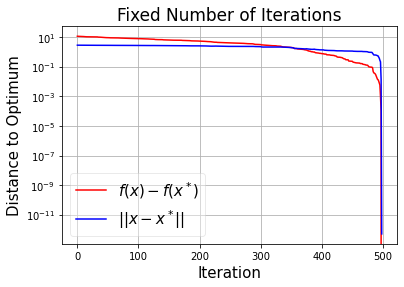

--------------------------------------------------------
CRITERION 2


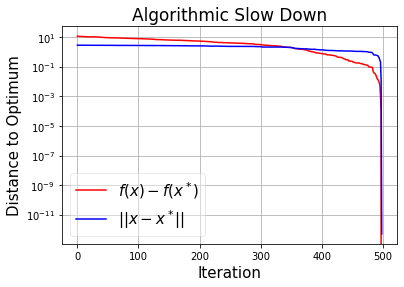

--------------------------------------------------------
CRITERION 3


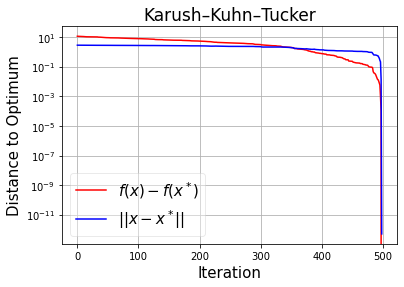

--------------------------------------------------------
CRITERION 4


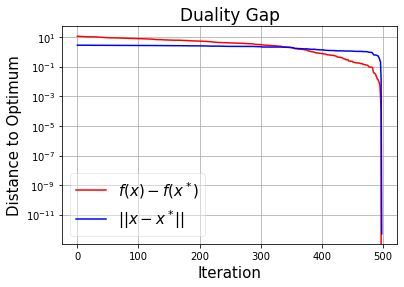

--------------------------------------------------------
CRITERION 5


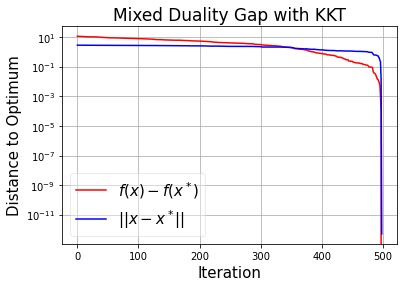

--------------------------------------------------------
CRITERION 6


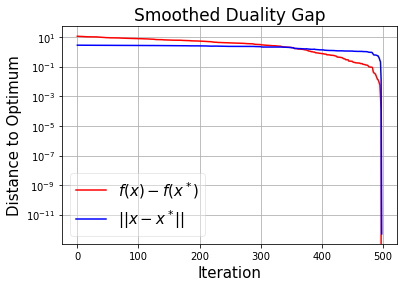

--------------------------------------------------------


In [8]:
F2, D2 = [], []
for i in range(len(criteria)):
    f, d = crit_Test(criteria_abbr[i], cvx2[0], cvx2[1], cvx2[2], splx2[4], c2, splx2[2], splx2[3], Ag = Ag2, bg = bg2, ite = splx2[-1]+1)
    F2.append(f)
    D2.append(d)
    print('CRITERION {}'.format(i+1))
    plot(f, '$f(x) - f(x^*)$', d, '$||x - x^*||$', criteria[i], fv, do)
    print('--------------------------------------------------------')

*************

### Example 02

In [9]:
ce, Ae, be = data()

In [10]:
cvx3, splx3 = solve(ce, Ae = Ae, be = be)

Phase2:- 


CRITERION 1


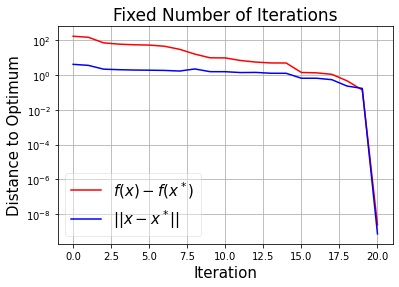

------------------------------------------cxz--------------
CRITERION 2


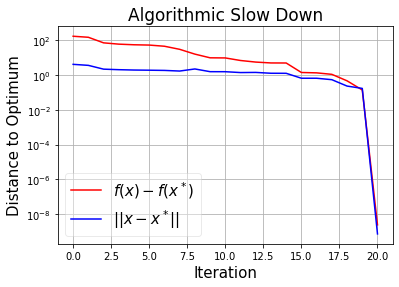

------------------------------------------cxz--------------
CRITERION 3


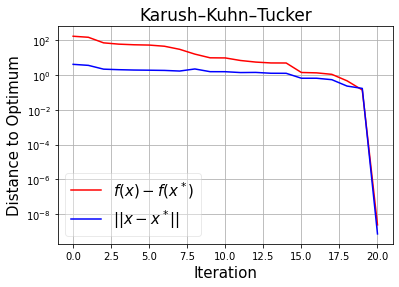

------------------------------------------cxz--------------
CRITERION 4


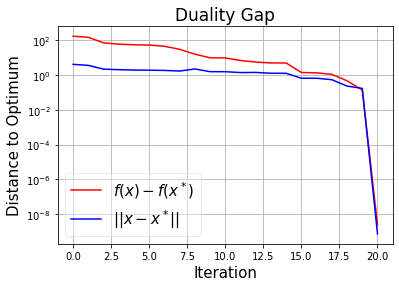

------------------------------------------cxz--------------
CRITERION 5


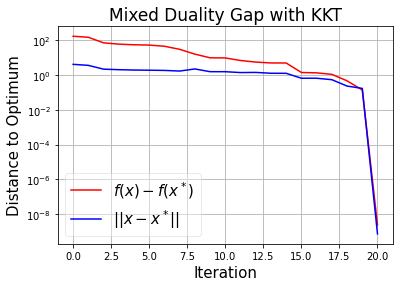

------------------------------------------cxz--------------
CRITERION 6


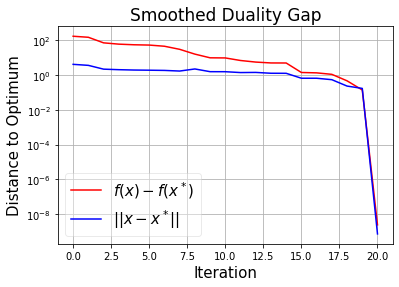

------------------------------------------cxz--------------


In [11]:
F3, D3 = [], []
for i in range(len(criteria)):
    f, d = crit_Test(criteria_abbr[i], cvx3[0], cvx3[1], cvx3[2], splx3[4], ce, splx3[2], splx3[3], Ae = Ae, be = be, ite = splx3[-1]+1)
    F3.append(f)
    D3.append(d)
    print('CRITERION {}'.format(i+1))
    plot(f, '$f(x) - f(x^*)$', d, '$||x - x^*||$', criteria[i], fv, do)
    print('------------------------------------------cxz--------------')

## Numerical illustration of our Results 

In [13]:
V, F, K, S, D, KS, SK, KD, SD, DS, VS, VK, FS = measures(splx3[2], splx3[3], cvx3[1], ce, Ae, be)

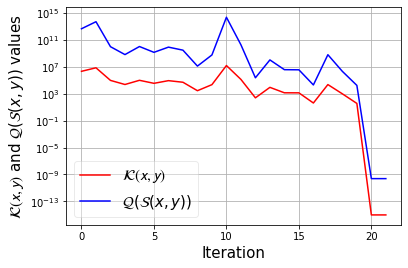

In [14]:
plot(K, '$\mathcal{K(x, y)}$', KS, '$\mathcal{Q}(\mathcal{S}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{K(x, y)}$ and $\mathcal{Q}(\mathcal{S}(x, y))$ values', xlabel = 'Iteration')

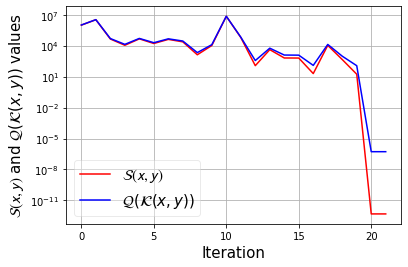

In [15]:
plot(S, '$\mathcal{S(x, y)}$', SK, '$\mathcal{Q}(\mathcal{K}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{S(x, y)}$ and $\mathcal{Q}(\mathcal{K}(x, y))$ values', xlabel = 'Iteration')

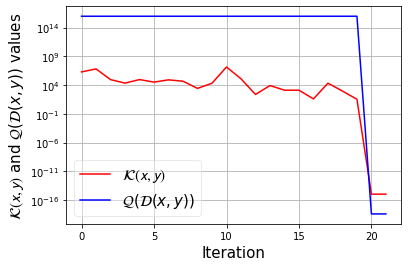

In [16]:
plot(K, '$\mathcal{K(x, y)}$', KD, '$\mathcal{Q}(\mathcal{D}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{K(x, y)}$ and $\mathcal{Q}(\mathcal{D}(x, y))$ values', xlabel = 'Iteration')

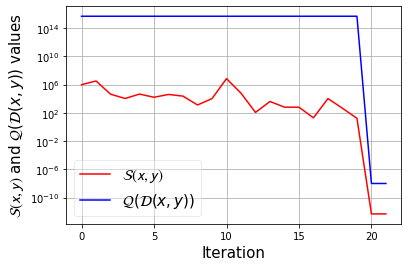

In [17]:
plot(S, '$\mathcal{S(x, y)}$', SD, '$\mathcal{Q}(\mathcal{D}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{S(x, y)}$ and $\mathcal{Q}(\mathcal{D}(x, y))$ values', xlabel = 'Iteration')

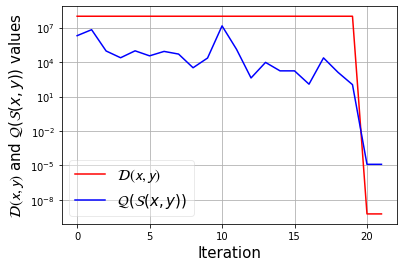

In [18]:
plot(D, '$\mathcal{D(x, y)}$', DS, '$\mathcal{Q}(\mathcal{S}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{D(x, y)}$ and $\mathcal{Q}(\mathcal{S}(x, y))$ values', xlabel = 'Iteration')

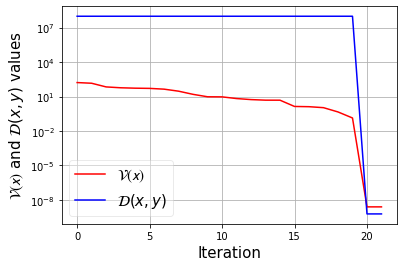

In [19]:
plot(V, '$\mathcal{V(x)}$', D, '$\mathcal{D}(x, y)$', '', simple=False,
                         ylabel1 = '$\mathcal{V(x)}$ and $\mathcal{D}(x, y)$ values', xlabel = 'Iteration')

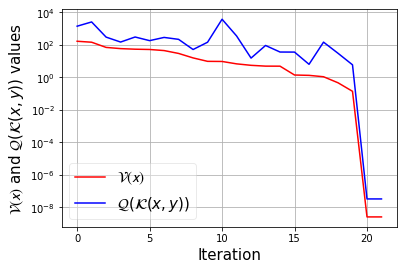

In [20]:
plot(V, '$\mathcal{V(x)}$', VK, '$\mathcal{Q}(\mathcal{K}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{V(x)}$ and $\mathcal{Q}(\mathcal{K}(x, y))$ values', xlabel = 'Iteration')

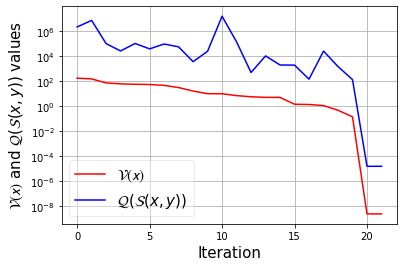

In [21]:
plot(V, '$\mathcal{V(x)}$', VS, '$\mathcal{Q}(\mathcal{S}(x, y))$', '', simple=False,
                         ylabel1 = '$\mathcal{V(x)}$ and $\mathcal{Q}(\mathcal{S}(x, y))$ values', xlabel = 'Iteration')

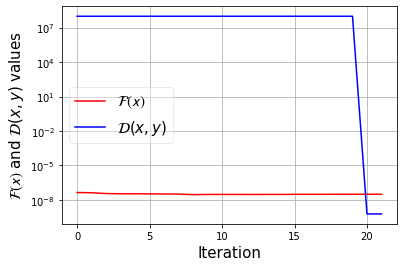

In [22]:
plot(F, '$\mathcal{F(x)}$', D, '$\mathcal{D}(x, y)$', '', simple=False, loc = 'center left',
                         ylabel1 = '$\mathcal{F(x)}$ and $\mathcal{D}(x, y)$ values', xlabel = 'Iteration')

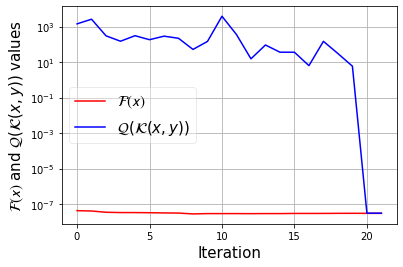

In [23]:
plot(F, '$\mathcal{F(x)}$', VK, '$\mathcal{Q}(\mathcal{K}(x, y))$', '', simple=False, loc = 'center left', 
                         ylabel1 = '$\mathcal{F(x)}$ and $\mathcal{Q}(\mathcal{K}(x, y))$ values', xlabel = 'Iteration')

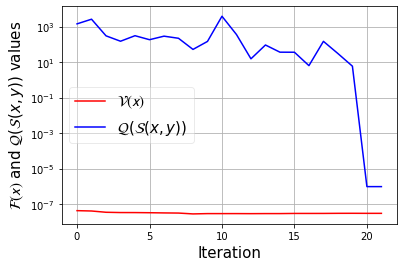

In [24]:
plot(F, '$\mathcal{V(x)}$', FS, '$\mathcal{Q}(\mathcal{S}(x, y))$', '', simple=False, loc = 'center left', 
                         ylabel1 = '$\mathcal{F(x)}$ and $\mathcal{Q}(\mathcal{S}(x, y))$ values', xlabel = 'Iteration')